# SIE LENS 
Analysing the images' properties in the case of SIE lens using GLAFIC.

~ Saif 01/03/22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"

In [3]:
theta = np.array([0, 45, 90])
fileName = ["radial_distance_caustics_0.csv",
           "radial_distance_caustics_45.csv",
           "radial_distance_caustics_90.csv"]

caustic_in = []
caustic_out = []

for i in range(len(fileName)):
    df_radial_distance = pd.read_csv(datadirName + fileName[i])
    df_get_radius_caustic_in = df_radial_distance.loc[df_radial_distance['images_num'] > 2.0]
    caustic_in.append(df_get_radius_caustic_in.iloc[-1]['radius'])
    df_get_radius_caustic_out = df_radial_distance.loc[df_radial_distance['images_num'] > 1.0]
    caustic_out.append(df_get_radius_caustic_out.iloc[-1]['radius'])

In [4]:
df_caustic_radii = pd.DataFrame(columns=('0', '45', '90'), index=('r_caustic_in', 'r_caustic_out'))
df_caustic_radii.loc['r_caustic_in'] = caustic_in
df_caustic_radii.loc['r_caustic_out'] = caustic_out
df_caustic_radii

,0,45,90
r_caustic_in,0.150754,0.0767513,0.174874
r_caustic_out,1.03116,1.03188,0.940704


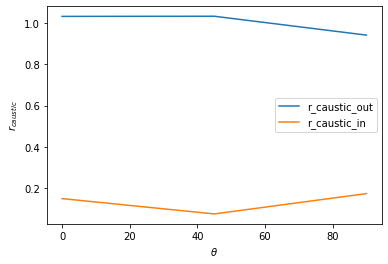

In [5]:
plt.plot(theta, caustic_out, label = 'r_caustic_out')
plt.plot(theta, caustic_in, label = 'r_caustic_in')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$r_{caustic}$')
plt.legend()

************************************************************************************************************************

************************************************************************************************************************

## TWO IMAGES CASE

In [6]:
df_theta_0 = pd.read_csv(datadirName + "flux_twoimages_theta_0.csv")
df_theta_0['I'] = np.abs(df_theta_0['mu_2']) / np.abs(df_theta_0['mu_1'])
df_theta_0

,source_x,mu_1,mu_2,td_1,td_2,I
0,0.160000,4.1632,-176.0585,0.0,45.385,42.289225
1,0.160306,4.1601,-166.9069,0.0,45.472,40.120887
2,0.162449,4.1387,-122.2970,0.0,46.080,29.549617
3,0.168265,4.0821,-70.6369,0.0,47.730,17.304059
4,0.179592,3.9776,-38.4492,0.0,50.943,9.666432
5,0.198265,3.8199,-21.6620,0.0,56.240,5.670829
6,0.226122,3.6135,-12.8620,0.0,64.142,3.559430
7,0.265000,3.3712,-7.9901,0.0,75.170,2.370106
8,0.316735,3.1108,-5.1253,0.0,89.845,1.647583
9,0.383163,2.8500,-3.3468,0.0,108.688,1.174316


In [7]:
df_theta_90 = pd.read_csv(datadirName + "flux_twoimages_theta_90.csv")
df_theta_90['I'] = np.abs(df_theta_90['mu_2']) / np.abs(df_theta_90['mu_1'])
df_theta_90

,source_y,mu_1,mu_2,td_1,td_2,I
0,0.180000,357.4663,-2.4867,0.0,47.402,0.006956
1,0.180262,332.5212,-2.4842,0.0,47.471,0.007471
2,0.182099,223.5195,-2.4663,0.0,47.954,0.011034
3,0.187085,118.5836,-2.4188,0.0,49.267,0.020397
4,0.196793,62.2944,-2.3299,0.0,51.824,0.037401
5,0.212799,35.2573,-2.1930,0.0,56.039,0.062200
6,0.236676,21.6614,-2.0085,0.0,62.327,0.092723
7,0.270000,14.2966,-1.7839,0.0,71.102,0.124778
8,0.314344,10.0187,-1.5324,0.0,82.780,0.152954
9,0.371283,7.3822,-1.2692,0.0,97.775,0.171927


In [8]:
df_theta_90_wo_flip = pd.read_csv(datadirName + "flux_twoimages_theta_90_wo_flip.csv")
df_theta_90_wo_flip['I'] = np.abs(df_theta_90_wo_flip['mu_2']) / np.abs(df_theta_90_wo_flip['mu_1'])
df_theta_90_wo_flip

,source_y,mu_1,mu_2,td_1,td_2,I
0,0.180000,-2.4867,357.4663,47.402,0.000,143.751277
1,0.180262,-2.4842,332.5212,47.471,0.000,133.854440
2,0.182099,-2.4663,223.5195,47.954,0.000,90.629485
3,0.187085,-2.4188,118.5836,49.267,0.000,49.025798
4,0.196793,-2.3299,62.2944,51.824,0.000,26.736941
5,0.212799,-2.1930,35.2573,56.039,0.000,16.077200
6,0.236676,-2.0085,21.6614,62.327,0.000,10.784864
7,0.270000,-1.7839,14.2966,71.102,0.000,8.014238
8,0.314344,-1.5324,10.0187,82.780,0.000,6.537914
9,0.371283,-1.2692,7.3822,97.775,0.000,5.816420


In [34]:
df_theta_90_w_position = pd.read_csv(datadirName + "flux_twoimages_theta_90_w_position.csv")
df_theta_90_w_position['I'] = np.abs(df_theta_90_w_position['mu_2']) / np.abs(df_theta_90_w_position['mu_1'])
df_theta_90_w_position

,source_y,x_1,y_1,x_2,y_2,mu_1,mu_2,td_1,td_2,I
0,0.180000,0.0,1.2465,0.0,-0.8865,357.4663,-2.4867,0.0,47.402,0.006956
1,0.180262,0.0,1.2468,0.0,-0.8863,332.5212,-2.4842,0.0,47.471,0.007471
2,0.182099,0.0,1.2486,0.0,-0.8844,223.5195,-2.4663,0.0,47.954,0.011034
3,0.187085,0.0,1.2536,0.0,-0.8795,118.5836,-2.4188,0.0,49.267,0.020397
4,0.196793,0.0,1.2633,0.0,-0.8698,62.2944,-2.3299,0.0,51.824,0.037401
5,0.212799,0.0,1.2793,0.0,-0.8537,35.2573,-2.1930,0.0,56.039,0.062200
6,0.236676,0.0,1.3032,0.0,-0.8299,21.6614,-2.0085,0.0,62.327,0.092723
7,0.270000,0.0,1.3365,0.0,-0.7965,14.2966,-1.7839,0.0,71.102,0.124778
8,0.314344,0.0,1.3809,0.0,-0.7522,10.0187,-1.5324,0.0,82.780,0.152954
9,0.371283,0.0,1.4378,0.0,-0.6953,7.3822,-1.2692,0.0,97.775,0.171927


In [9]:
df_theta_45 = pd.read_csv(datadirName + "flux_twoimages_theta_45.csv")
df_theta_45['I'] = np.abs(df_theta_45['mu_2']) / np.abs(df_theta_45['mu_1'])
df_theta_45

,source_x,mu_1,mu_2,td_1,td_2,I
0,0.084853,5.8270,-4.4945,0.0,29.851,0.771323
1,0.085183,5.8225,-4.4900,0.0,29.929,0.771146
2,0.087492,5.7908,-4.4581,0.0,30.479,0.769859
3,0.093759,5.7065,-4.3725,0.0,31.981,0.766231
4,0.105963,5.5488,-4.2098,0.0,34.936,0.758687
5,0.126084,5.3051,-3.9512,0.0,39.888,0.744793
6,0.156099,4.9744,-3.5858,0.0,47.425,0.720851
7,0.197990,4.5699,-3.1183,0.0,58.165,0.682356
8,0.253734,4.1200,-2.5785,0.0,72.727,0.625850
9,0.325310,3.6626,-2.0192,0.0,91.708,0.551302


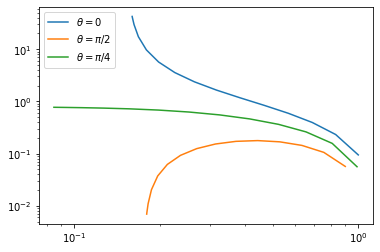

In [10]:
plt.loglog(np.array(df_theta_0['source_x']), np.array(df_theta_0['I']), label = r'$\theta = 0$')
plt.loglog(np.array(df_theta_90['source_y']), np.array(df_theta_90['I']), label = r'$\theta = \pi / 2$')
#plt.loglog(np.array(df_theta_90_wo_flip['source_y']), np.array(df_theta_90_wo_flip['I']), label = r'$\theta = \pi / 2$ wo flip')
plt.loglog(np.array(df_theta_45['source_x']), np.array(df_theta_45['I']), label = r'$\theta = \pi / 4$')
plt.legend(loc = 2)

************************************************************************************************************************

************************************************************************************************************************

## FOUR IMAGES CASE

In [11]:
df_theta_0_four = pd.read_csv(datadirName + "flux_fourimages_theta_0.csv")
df_theta_0_four['I_2'] = np.abs(df_theta_0_four['mu_2']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_3'] = np.abs(df_theta_0_four['mu_3']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_4'] = np.abs(df_theta_0_four['mu_4']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,0.010000,7.0496,7.8876,-6.0696,-6.0696,0.0,2.837,12.714,12.714,1.118872,0.860985,0.860985
1,0.073429,5.3652,13.2841,-7.9302,-7.9302,0.0,20.829,24.024,24.024,2.475975,1.478081,1.478081
2,0.088091,5.1013,16.0008,-9.1587,-9.1587,0.0,24.988,27.148,27.148,3.136612,1.795366,1.795366
3,0.098191,4.9372,18.6973,-10.4266,-10.4266,0.0,27.853,29.414,29.414,3.787025,2.111845,2.111845
4,0.106141,4.8171,21.6134,-11.8261,-11.8261,0.0,30.108,31.264,31.264,4.486807,2.455025,2.455025
5,0.112797,4.7220,24.9128,-13.4296,-13.4296,0.0,31.996,32.859,32.859,5.275900,2.844049,2.844049
6,0.118576,4.6432,28.7723,-15.3212,-15.3212,0.0,33.635,34.278,34.278,6.196653,3.299707,3.299707
7,0.123715,4.5759,33.4261,-17.6156,-17.6156,0.0,35.093,35.566,35.566,7.304814,3.849647,3.849647
8,0.128363,4.5171,39.2182,-20.4833,-20.4833,0.0,36.411,36.753,36.753,8.682163,4.534613,4.534613
9,0.132620,4.4649,46.6940,-24.1963,-24.1963,0.0,37.619,37.859,37.859,10.458017,5.419226,5.419226


In [12]:
df_theta_45_four = pd.read_csv(datadirName + "flux_fourimages_theta_45.csv")
df_theta_45_four['I_2'] = np.abs(df_theta_45_four['mu_2']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_3'] = np.abs(df_theta_45_four['mu_3']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_4'] = np.abs(df_theta_45_four['mu_4']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four

,source_x,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,0.014142,7.0668,7.9181,-6.5010,-5.6858,0.0,2.831,11.437,14.066,1.120465,0.919935,0.804579
1,0.039771,6.5352,9.3333,-7.8879,-5.1824,0.0,7.858,12.214,19.506,1.428158,1.206987,0.792998
2,0.045695,6.4296,9.8684,-8.4178,-5.0820,0.0,8.982,12.482,20.816,1.534839,1.309226,0.790407
3,0.049777,6.3597,10.3240,-8.8703,-5.0152,0.0,9.744,12.688,21.728,1.623347,1.394767,0.788591
4,0.052989,6.3061,10.7512,-9.2952,-4.9638,0.0,10.336,12.863,22.451,1.704889,1.474001,0.787143
5,0.055678,6.2620,11.1700,-9.7123,-4.9215,0.0,10.826,13.019,23.060,1.783775,1.550990,0.785931
6,0.058014,6.2245,11.5913,-10.1322,-4.8853,0.0,11.246,13.162,23.592,1.862206,1.627793,0.784850
7,0.060090,6.1915,12.0230,-10.5628,-4.8535,0.0,11.616,13.295,24.066,1.941856,1.706016,0.783897
8,0.061968,6.1621,12.4716,-11.0104,-4.8250,0.0,11.946,13.420,24.497,2.023920,1.786793,0.783012
9,0.063688,6.1354,12.9430,-11.4811,-4.7991,0.0,12.246,13.539,24.893,2.109561,1.871288,0.782198


In [13]:
df_theta_90_four = pd.read_csv(datadirName + "flux_fourimages_theta_90.csv")
df_theta_90_four['I_2'] = np.abs(df_theta_90_four['mu_2']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_3'] = np.abs(df_theta_90_four['mu_3']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_4'] = np.abs(df_theta_90_four['mu_4']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four

,source_y,mu_1,mu_2,mu_3,mu_4,td_1,td_2,td_3,td_4,I_2,I_3,I_4
0,0.010000,7.4642,7.4642,-6.4653,-5.6647,0.0,0.0,9.975,12.609,1.0,0.866175,0.758916
1,0.082491,9.4148,9.4148,-12.2209,-3.7994,0.0,0.0,3.076,24.799,1.0,1.298052,0.403556
2,0.099246,10.7050,10.7050,-15.0880,-3.5078,0.0,0.0,2.059,28.195,1.0,1.409435,0.327679
3,0.110790,12.0292,12.0292,-17.9137,-3.3267,0.0,0.0,1.480,30.656,1.0,1.489185,0.276552
4,0.119875,13.4814,13.4814,-20.9476,-3.1940,0.0,0.0,1.093,32.662,1.0,1.553815,0.236919
5,0.127482,15.1330,15.1330,-24.3528,-3.0891,0.0,0.0,0.816,34.387,1.0,1.609251,0.204130
6,0.134087,17.0643,17.0643,-28.2998,-3.0021,0.0,0.0,0.608,35.919,1.0,1.658421,0.175929
7,0.139960,19.3822,19.3822,-33.0076,-2.9279,0.0,0.0,0.450,37.308,1.0,1.702985,0.151061
8,0.145272,22.2421,22.2421,-38.7899,-2.8630,0.0,0.0,0.328,38.584,1.0,1.743986,0.128720
9,0.150137,25.8843,25.8843,-46.1297,-2.8055,0.0,0.0,0.233,39.770,1.0,1.782150,0.108386


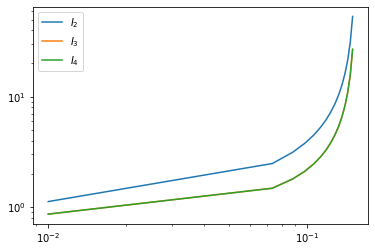

In [14]:
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_2']), label = r'$I_2$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_3']), label = r'$I_3$')
plt.loglog(np.array(df_theta_0_four['source_x']), np.array(df_theta_0_four['I_4']), label = r'$I_4$')
plt.legend()

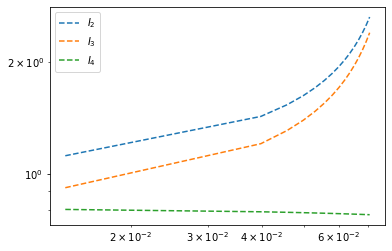

In [15]:
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_2']), label = r'$I_2$', ls = '--')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_3']), label = r'$I_3$', ls = '--')
plt.loglog(np.array(df_theta_45_four['source_x']), np.array(df_theta_45_four['I_4']), label = r'$I_4$', ls = '--')
plt.legend()

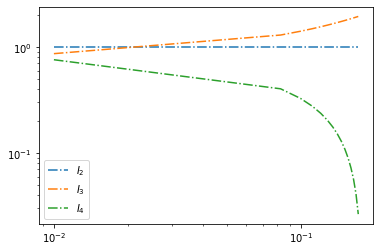

In [16]:
plt.loglog(np.array(df_theta_90_four['source_y']), np.array(df_theta_90_four['I_2']), label = r'$I_2$', ls = '-.')
plt.loglog(np.array(df_theta_90_four['source_y']), np.array(df_theta_90_four['I_3']), label = r'$I_3$', ls = '-.')
plt.loglog(np.array(df_theta_90_four['source_y']), np.array(df_theta_90_four['I_4']), label = r'$I_4$', ls = '-.')
plt.legend()

## READING THE TIME DELAY SURFACE 

In [17]:
from astropy.io import fits
fits_time_delay = fits.open('/Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits')
fits_time_delay.info()

Filename: /Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (50, 50)   float32   


In [18]:
hdu_time_delay = fits_time_delay[0]
time_dalay_data = hdu_time_delay.data

In [19]:
x = np.arange(-5, 5, 0.2)
y = np.arange(-5, 5, 0.2)
xx, yy = np.meshgrid(x, y)

Text(0.5, 1.0, 'x = 0.17, y = 0')

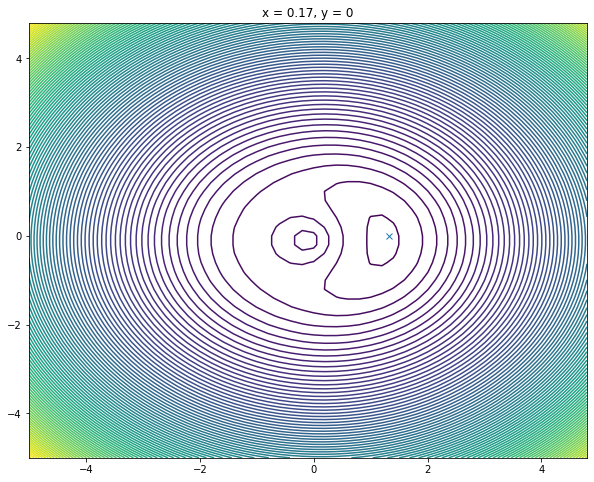

In [132]:
fig, ax = plt.subplots(figsize = (10, 8))
time_delay_surf = ax.contour(xx, yy, time_dalay_data, 100)
ax.plot(1.3188, 0, marker = 'x', label = 'td = 0')
#ax.plot(-0.9788, 0, marker = 'x', label = 'td = 48.22')
#ax.plot(1.2, -0.2, marker = 'o')
#ax.plot(1.2, 4.4408921e-15, marker = 'o')
#plt.clabel(time_delay_surf, fontsize = 8)
plt.title('x = 0.17, y = 0')

In [127]:
itemindex = np.where(time_dalay_data == time_dalay_data.min())
print(time_dalay_data[itemindex])
print(xx[itemindex])
print(yy[itemindex])

[-105.412674 -105.412674]
[1.2 1.2]
[-2.0000000e-01  4.4408921e-15]


In [102]:

'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(xx, yy, time_dalay_data, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(xx, yy, time_dalay_data, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(xx, yy, time_dalay_data, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(xx, yy, time_dalay_data, zdir='y', offset=40, cmap=cm.coolwarm)



ax.set_xlabel('xx')
ax.set_xlim(-5, 5)
ax.set_ylabel('yy')
ax.set_ylim(-5, 5)
ax.set_zlabel('time delay')
ax.set_zlim(0, 2000)
'''



"\n\nfrom mpl_toolkits.mplot3d import axes3d\nimport matplotlib.pyplot as plt\nfrom matplotlib import cm\n\nfig = plt.figure(figsize = (10, 8))\nax = fig.gca(projection='3d')\nX, Y, Z = axes3d.get_test_data(0.05)\nax.plot_surface(xx, yy, time_dalay_data, rstride=8, cstride=8, alpha=0.3)\ncset = ax.contour(xx, yy, time_dalay_data, zdir='z', offset=-100, cmap=cm.coolwarm)\ncset = ax.contour(xx, yy, time_dalay_data, zdir='x', offset=-40, cmap=cm.coolwarm)\ncset = ax.contour(xx, yy, time_dalay_data, zdir='y', offset=40, cmap=cm.coolwarm)\n\n\n\nax.set_xlabel('xx')\nax.set_xlim(-5, 5)\nax.set_ylabel('yy')\nax.set_ylim(-5, 5)\nax.set_zlabel('time delay')\nax.set_zlim(0, 2000);\n"